In [1]:
using NBInclude
@nbinclude("(M)_Kagome_SP_Real_Space.ipynb")

Parameters:
Number of Unit-Cells in Each Directions=3X2
Number of Sites=18
Hopping Amplitudes: t1=-1,L1=0.28,t2=0.3,L2=0.2


18×18 PyArray{ComplexF64, 2}:
  0.0+0.0im   -1.0-0.28im  -1.0+0.28im  …   0.3+0.2im    0.0+0.0im
 -1.0+0.28im   0.0+0.0im   -1.0-0.28im      0.0+0.0im    0.0+0.0im
 -1.0-0.28im  -1.0+0.28im   0.0+0.0im      -1.0+0.28im   0.0+0.0im
  0.0+0.0im    0.3+0.2im   -1.0+0.28im     -1.0-0.28im   0.3-0.2im
  0.3-0.2im    0.0+0.0im    0.3+0.2im       0.0+0.0im    0.0+0.0im
 -1.0-0.28im   0.3-0.2im    0.0+0.0im   …   0.3-0.2im    0.0+0.0im
  0.0+0.0im   -1.0-0.28im   0.3-0.2im       0.0+0.0im    0.3-0.2im
  0.0+0.0im    0.0+0.0im    0.0+0.0im       0.0+0.0im   -1.0-0.28im
  0.0+0.0im    0.3-0.2im    0.0+0.0im       0.0+0.0im    0.0+0.0im
  0.0+0.0im    0.3+0.2im    0.0+0.0im       0.0+0.0im    0.0+0.0im
  0.0+0.0im    0.0+0.0im    0.0+0.0im   …   0.0+0.0im    0.3+0.2im
  0.3+0.2im   -1.0+0.28im   0.0+0.0im       0.0+0.0im    0.0+0.0im
  0.0+0.0im    0.0+0.0im    0.0+0.0im       0.3+0.2im   -1.0+0.28im
 -1.0+0.28im   0.0+0.0im    0.3+0.2im       0.0+0.0im    0.3+0.2im
  0.3+0.2im    0.0+0.0im    0.

### N-Level Single Particle Basis

In [3]:
using QuantumOptics

In [4]:
#Create N Level Basis 
NBasis = NLevelBasis(N)
# Total Particle Number
PN=2

2

### Hard-Core Interaction

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
Generalized Fermionic Fock States:
\begin{align}
c_\alpha^{\dagger}\ket{...,n_\beta,n_\alpha,n_\gamma,...} =(-1)^{\sum_{\beta<\alpha}n_{\beta}}\left(\sqrt{n_\alpha+1} \right) \ket{...,n_\beta,n_\alpha+1,n_\gamma,...} 
\\
c_\alpha\ket{...,n_\beta,n_\alpha,n_\gamma,...} =(-1)^{\sum_{\beta<\alpha}n_{\beta}}\sqrt{n_\alpha} \ket{...,n_\beta,n_\alpha-1,n_\gamma,...} 
\end{align}

But, is transition operator fermionic or bosonic? Let's check:

In [6]:
# ParticleNum = 2; HardCoreStates = fermionstates(NBasis, [ParticleNum]); HardCoreBasis =  ManyBodyBasis(NBasis, HardCoreStates)
# dense(transition(HardCoreBasis, 2,1))

Transition operator is bosonic operator due to fermionic states doesn't include -1 coefficient in transition matrix.
So, we can construct hard core many body basis by using fermionic states. Note that we work only bosons on lattice.

--------------

Construct hard-core states of bosonic system (Delete 2 occupation number in bosonic system):

In [7]:
# # Find hard-core states for only 2 particle
# function delete(M,N)
#     """
#     M is bosonic states
#     N is occupation number
#     Returns Delete N occupation states from M bosonic states
#     """
#     function myCondition(y)
#         return N == y
#     end
#     m = []
#     for i in 1:length(M)
#        if findfirst(myCondition,M[i]) != nothing
#             push!(m,i)
#        end
#     end
#     return deleteat!(M,m)
# end

In [8]:
# # All of states in N Fock Space 
# # Max. Occupation number is equal to 1 (Hard-Core Interaction or Many-Body for Fermionic States)
# HC_States = bosonstates(NBasis, [PN]) 
# # Delete PN=2 states from bosonic states to use in hard-core intereaction
# HC_States = delete(HC_States, 2)
# # Many-Body Basis
# HC_Basis_MB = ManyBodyBasis(NBasis, HC_States)

Conclusion: Hard-Core Bosonic System with Delete Function = Fermionic System

-----------

In [5]:
HC_States = fermionstates(NBasis, [PN]) 
HC_Basis_MB = ManyBodyBasis(NBasis, HC_States)
HC_States

153-element Vector{Vector{Int64}}:
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
 [0, 0, 0,

In [15]:
# Many-Body Hamiltonian using METHOD #1 (MANUEL CONSTRUCTING)
HC_Hamiltonian_MB = SparseOperator(HC_Basis_MB)
# Number of states for Hard-core bosonic system is equal to number of states for fermionic system
for m in 1:N
    for n in 1:N
        global HC_Hamiltonian_MB
        # Phase Factors= H_NN[m,n] and H_NNN[m,n]
        # Hopping Terms= transition(HC_NBasis_MB, m, n)
        # The Neighbors Condition Hides Here: H[m,n]
        HC_Hamiltonian_MB = HC_Hamiltonian_MB + H[m,n] * transition(HC_Basis_MB, m, n)
    end
end
# All of Energies of Hard-Core Interaction
# y = eigenenergies(dense(HC_Hamiltonian_MB))    
# Just lowest energies
y = real(eigenenergies(dense(HC_Hamiltonian_MB)))
# Note That: Single Particle (PN=1) Eigenvalues of Julia Code is the same in Momentum Space for All Hopping Parameter.

153-element Vector{Float64}:
 -5.58537378838549
 -5.542998291226995
 -5.542998291226988
 -5.542604373130354
 -5.542604373130351
 -5.541167791087969
 -5.523696911300611
 -5.523696911300603
 -5.516738552960643
 -4.973917644641386
 -4.973917644641382
 -4.961613542202371
 -4.855156177062233
  ⋮
  4.676516690145023
  4.67651669014503
  4.73669873759754
  4.8956966574264404
  5.036161728733726
  5.036161728733726
  5.170351973411512
  5.170351973411519
  5.1803472048611825
  5.563298047998195
  5.633678155914392
  5.633678155914414

Filling fraction for topological dejeneracy:
\begin{align}
\frac{1}{2} = \frac{N}{N_{cell}} = \frac{N}{N1N2}
\end{align}

In [16]:
println("Parameters:")
println("Number of Particle=",PN)
println("Number of Unit-Cell=",Nx*Ny)
println("Filling Fraction=",PN/(Nx*Ny))

Parameters:
Number of Particle=2
Number of Unit-Cell=6
Filling Fraction=0.3333333333333333


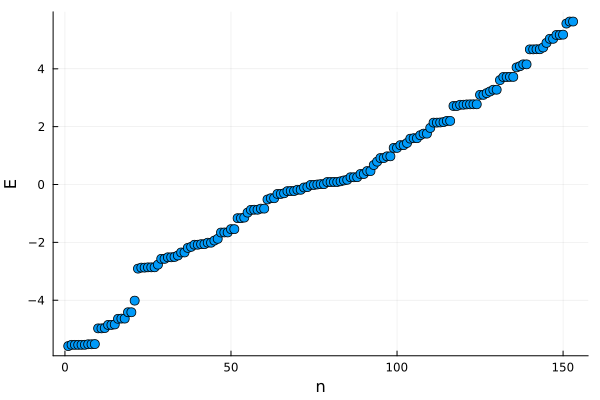

In [17]:
using Plots
# Plot Energies
x=1:length(y)
gr()
plot(x, y, seriestype = :scatter, markersize = 5, legend=false, xlabel="n", ylabel="E")

#### Topological Flat Bands

\begin{equation}
N_d=N_{\phi}-N/\nu_0  \quad \text{(If SP is a flat band}N_{d}=1), \quad \nu_0=1/2 \rightarrow N_d=N_{\phi}-2N=1 \rightarrow N_{\phi}=2N+1
\end{equation}
Ground states degeneracy number given as:
\begin{equation}
D(N,N_d,N_{\phi}) = \frac{(N_d+N-1)!}{N_d!(N-1)!}\frac{N_{\phi}}{N} \rightarrow D=N_{\phi}, \quad N_{\phi}=N_1N_2\phi, \quad \phi\text{:Magnetic flux per plaquet}
\end{equation}
$N_{\phi}$ is equal to unit-cell number, then it is calculated as $D=2N+1$. So, physical filling fraction $N/N_{\phi}=\frac{N}{2N+1}$. For instance, let's say total number of particles $N=4$ and number of unit-cell in each direction $N_xN_y=3X3$. Therefore we wait to get $D=N_{\phi}=2*4+1=9$ ground state degeneracy.

### Bose-Hubbard

\begin{equation}
H = -t \sum_{<ij>} \left( b_i^\dagger b_j + h.c. \right) + U/2 \sum_i n_i \left( n_i -1\right)
\end{equation}

In [18]:
NBasis

NLevel(N=18)

In [19]:
# All of states in N Fock Space
# Define Maximum Occupation Number (Total Particle Number) for Many-Body Basis
States = bosonstates(NBasis, [PN]) 
# Many-Body Basis
Basis_MB = ManyBodyBasis(NBasis, States)

ManyBody(onebodybasis=NLevel(N=18), states:171)

In [28]:
# On-Site Potantiel Term
U=1/1000
# Kinetic term
KT = SparseOperator(Basis_MB)
# Interaction term
IT = SparseOperator(Basis_MB)
for m in 1:N
    global IT;global KT
    # Occupation (total particle) Operator: number()
    IT = IT + U/2 * number(Basis_MB, m) * ( number(Basis_MB, m) - identityoperator(Basis_MB) ) 
    for n in 1:N
        KT = KT + H[m,n] * transition(Basis_MB, m, n)
    end
end
MB_Hamiltonian = KT + IT
# Energies of Many-Body Hamiltonian with On-Site Interaction
yy = eigenenergies(dense(MB_Hamiltonian)) 

171-element Vector{Float64}:
 -5.585538398480606
 -5.543277890631594
 -5.5432778906315905
 -5.542931724729546
 -5.542931724729542
 -5.541934197467838
 -5.524576832284702
 -5.524576832284675
 -5.520766858412783
 -5.071273128033325
 -5.071273128033304
 -5.062353009861375
 -4.981877008361772
  ⋮
 20.4825573561149
 20.484745150880894
 20.484745150880915
 20.500168294194175
 20.500168294194197
 20.52103308930002
 20.642830905633357
 20.643461994840827
 20.64346199484084
 20.708882699093003
 20.708882699093003
 20.84569935369824

In [29]:
println("Parameters:")
println("Amplitude of Lattice Potantiel=",U)
println("Number of Particle=",PN)
println("Number of Unit-Cell=",Nx*Ny)
println("Filling Fraction=",PN/(Nx*Ny))

Parameters:
Amplitude of Lattice Potantiel=20
Number of Particle=2
Number of Unit-Cell=6
Filling Fraction=0.3333333333333333


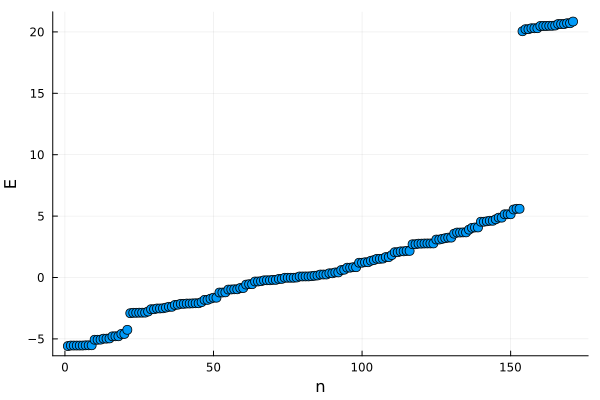

In [30]:
# Plot Energies
xx=1:length(yy)
gr()
plot(xx, yy, seriestype = :scatter, markersize = 5, legend=false, xlabel="n", ylabel="E")

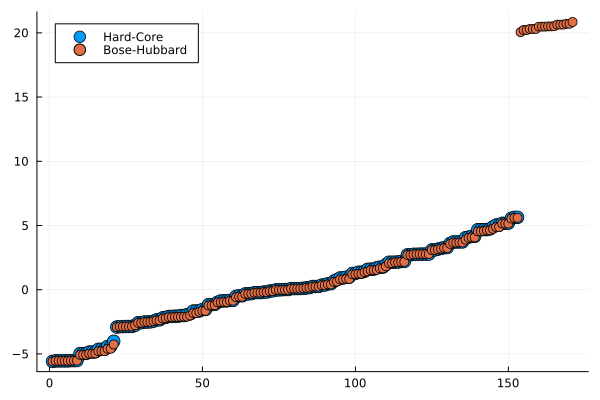

In [31]:
# U yeterince büyük iken bose-hubbard enerjileri, hard-core enerjilerine yaklaşır
plot(x, y, seriestype = :scatter, markersize = 7, label="Hard-Core")
plot!(xx, yy, seriestype = :scatter, markersize = 5, label="Bose-Hubbard", legend=:topleft)